<a href="https://colab.research.google.com/github/arvind-maurya/MachineLearning/blob/master/Idly_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Arvind Maurya , Dr Amitkumar Khatu,

Pune- Pimpri Centre

We thought to do this regression analysis of one of the breakfast item using ML as assignment


Note: Most of the code and defination is taken from internet

In [ ]:
#First, we import the required packages
import pandas as pd #the pandas library is useful for data processing 
import matplotlib.pyplot as plt #the matplotlib library is useful for plotting purposes

# The following python directive helps to plot the graph in the notebook directly
%matplotlib inline

In [ ]:
#Let us explore the data and the description 

#Get the data from the web 
Idli_data = pd.read_excel('/content/Idly.xlsx')

#print the first few rows of the data 
Idli_data.head()

,X1,X2,X3,X4,Y
0,40,65,59,65,70
1,65,59,65,70,63
2,59,65,70,63,67
3,65,70,63,67,63
4,70,63,67,63,62


In [ ]:
Idli_data

,X1,X2,X3,X4,Y
0,40,65,59,65,70
1,65,59,65,70,63
2,59,65,70,63,67
3,65,70,63,67,63
4,70,63,67,63,62
...,...,...,...,...,...
110,61,65,61,66,44
111,65,61,66,44,59
112,61,66,44,59,59
113,66,44,59,59,59


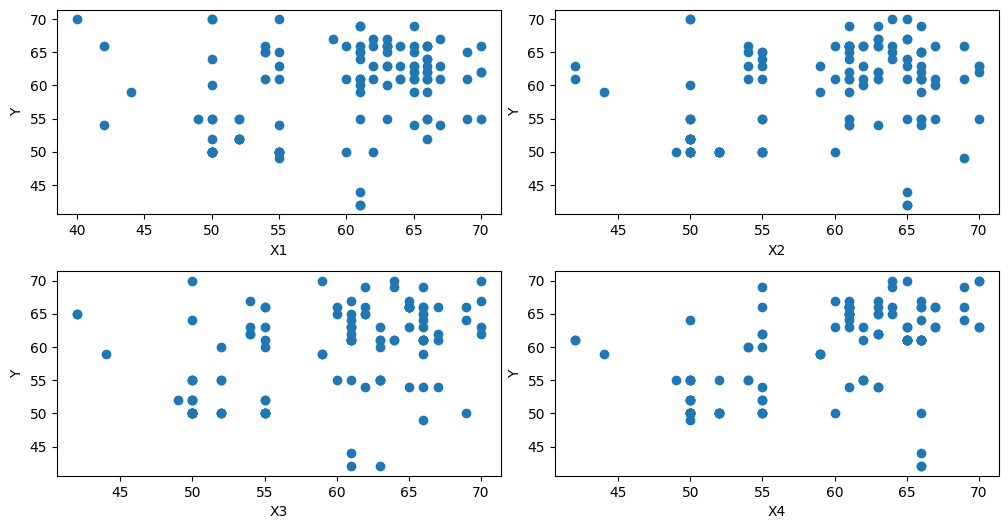

In [ ]:
#We will plot multiple scatter plots of Y vs other X attributes
fig = plt.figure(figsize=(10, 10)) 

fig.constrained_layout=True

ax11 = fig.add_subplot(421)
ax12 = fig.add_subplot(422)
ax21 = fig.add_subplot(423)
ax22 = fig.add_subplot(424)


ax11.scatter(Idli_data['X1'],Idli_data['Y'])
ax11.set_xlabel('X1')
ax11.set_ylabel('Y')


ax12.scatter(Idli_data['X2'],Idli_data['Y'])
ax12.set_xlabel('X2')
ax12.set_ylabel('Y')

ax21.scatter(Idli_data['X3'],Idli_data['Y'])
ax21.set_xlabel('X3')
ax21.set_ylabel('Y')

ax22.scatter(Idli_data['X4'],Idli_data['Y'])
ax22.set_xlabel('X4')
ax22.set_ylabel('Y')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

Looking at the above scattered curve it is clear that modelling these data using regression model will be bad idea.

In [ ]:
# Making dataset
import pandas
import numpy as np


df = pandas.read_excel("/content/Idly.xlsx")
df

X = df[['X1', 'X2', 'X3', 'X4']]
y = df['Y']


In [ ]:
#Splitting the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [ ]:
#Fitting the Multiple Linear Regression model
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()  
mlr.fit(x_train, y_train)

LinearRegression()

In [ ]:
#Intercept and Coefficient
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(X, mlr.coef_))

Intercept:  17.40375644949149
Coefficients:


[('X1', 0.05772320728238788),
 ('X2', 0.03652638645506007),
 ('X3', 0.08438842701582043),
 ('X4', 0.5249718839740329)]

In [ ]:
#Prediction of test set
y_pred_mlr= mlr.predict(x_test)
#Predicted values
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [52.76688362 52.9459205  63.01456178 65.59703832 57.8510794  53.04164458
 62.55171125 62.77964973 60.95013038 63.0949256  55.20911111 63.5321973
 62.28281217 51.00232981 60.08691725 63.26809523 63.0949256  54.05613759
 60.20236367 62.5944623  63.03936442 63.46249236 53.81682739 60.9767956
 52.87793726 52.6996981  61.35231411 59.7851283  60.67684391 58.90321246
 51.07538258 62.98164659 62.01846287 62.60648011 52.65730446]


In [ ]:
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff.head()

,Actual value,Predicted value
88,64,52.766884
80,50,52.945920
50,66,63.014562
28,64,65.597038
95,66,57.851079


In [ ]:
#Model Evaluation
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
print('R squared: {:.2f}'.format(mlr.score(X,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 28.10
Mean Absolute Error: 4.569022936316685
Mean Square Error: 36.76289446611557
Root Mean Square Error: 6.063241250858782


R Squared: R Square is the coefficient of determination. It tells us how many points fall on the regression line. The value of R Square is 28.10, which indicates that only 28.10% of the data fit the regression model.

Mean Absolute Error: Mean Absolute Error is the absolute difference between the actual or true values and the predicted values. The lower the value, the better is the model’s performance. A mean absolute error of 0 means that your model is a perfect predictor of the outputs. The mean absolute error obtained for this particular model is 4.569, which is far away from 0.

Mean Square Error: Mean Square Error is calculated by taking the average of the square of the difference between the original and predicted values of the data. The lower the value, the better is the model’s performance. The mean square error obtained for this particular model is 36.76, which is pretty bad here.

Root Mean Square Error: Root Mean Square Error is the standard deviation of the errors which occur when a prediction is made on a dataset. This is the same as Mean Squared Error, but the root of the value is considered while determining the accuracy of the model. The lower the value, the better is the model’s performance. The root mean square error obtained for this particular model is 6.06, which is pretty bad here.

Conclusion

The Multiple Linear Regression model performs very bad  as only 28% of the data fit the regression model. Also, the mean absolute error, mean square error, and the root mean square error are very high.

We need to analyse the data and the way data is collect to increase the accuracy of the model